## **ASSIGNMENT1** - **Applying MLP CLASSIFIER On WINE DATASET**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#READ
df=pd.read_csv('/content/winequality_red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
#CHECK IF ANY NULL DATAVALUES
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **splitting the dataset into test and train**

In [24]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:11]
Y=df.iloc[:,-1]
xtrain,xtest,ytrain ,ytest  = train_test_split(X,Y,test_size=0.30,random_state=1)

In [25]:
X=df.iloc[:,0:10]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


In [26]:
Y=df.iloc[:,-1]
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [27]:
#SHAPE
print(f'xtrain shape {xtrain.shape} ')
print(f'ytrain shape {ytrain.shape} ')
print(f'xtest shape {xtest.shape} ')

xtrain shape (1119, 11) 
ytrain shape (1119,) 
xtest shape (480, 11) 


**DATA STANDARDIZATION**

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain_transform=scaler.fit_transform(xtrain)
xtrain_transform[0:10]

array([[0.31858407, 0.82876712, 0.        , 0.06153846, 0.11538462,
        0.02816901, 0.02205882, 0.48394495, 0.62204724, 0.09580838,
        0.38461538],
       [0.23893805, 0.25342466, 0.1       , 0.13076923, 0.09364548,
        0.04225352, 0.02941176, 0.42431193, 0.44094488, 0.08383234,
        0.32307692],
       [0.36283186, 0.49315068, 0.        , 0.03846154, 0.08862876,
        0.32394366, 0.09926471, 0.40749235, 0.41732283, 0.13173653,
        0.2       ],
       [0.34513274, 0.31849315, 0.18      , 0.09230769, 0.11036789,
        0.05633803, 0.08823529, 0.50688073, 0.36220472, 0.08982036,
        0.21538462],
       [0.40707965, 0.30136986, 0.18      , 0.05384615, 0.11036789,
        0.12676056, 0.05514706, 0.43501529, 0.32283465, 0.09580838,
        0.23076923],
       [0.32743363, 0.13013699, 0.39      , 0.11538462, 0.11036789,
        0.22535211, 0.13602941, 0.33409786, 0.4488189 , 0.26347305,
        0.63076923],
       [0.30088496, 0.32191781, 0.05      , 0.08461538, 0.

**DATA TRANSFORM**

In [29]:
xtest_tansform=scaler.fit_transform(xtest)
xtest_tansform[0:10]

array([[0.35849057, 0.29145729, 0.81012658, 0.0890411 , 0.09440559,
        0.09230769, 0.12720848, 0.62628488, 0.76136364, 0.1835443 ,
        0.33962264],
       [0.3490566 , 0.51256281, 0.35443038, 0.12328767, 0.09965035,
        0.21538462, 0.22261484, 0.53377386, 0.44318182, 0.16455696,
        0.28301887],
       [0.50943396, 0.22110553, 0.73417722, 0.19178082, 0.23601399,
        0.04615385, 0.03533569, 0.50881057, 0.36363636, 0.20886076,
        0.49056604],
       [0.19811321, 0.34170854, 0.25316456, 0.06849315, 0.06643357,
        0.38461538, 0.16961131, 0.40602056, 0.56818182, 0.17088608,
        0.32075472],
       [0.19811321, 0.27135678, 0.15189873, 0.08219178, 0.04545455,
        0.16923077, 0.06360424, 0.17988253, 0.48863636, 0.10126582,
        0.86792453],
       [0.18867925, 0.10050251, 0.37974684, 0.06164384, 0.04545455,
        0.2       , 0.04946996, 0.48825257, 0.84090909, 0.28481013,
        0.24528302],
       [0.35849057, 0.15075377, 0.58227848, 0.08219178, 0.

**MODEL-MLP CLASSIFIER**

In [30]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(120,100,46),activation='relu',max_iter=100,solver='adam')
model.fit(xtrain_transform,ytrain)
ypred=model.predict(xtest_tansform)
ypred

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([5, 5, 6, 6, 7, 6, 6, 5, 4, 5, 6, 5, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 7, 5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 5,
       7, 5, 6, 7, 5, 6, 5, 5, 4, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       7, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 7, 6, 4, 5, 5, 6, 5, 5, 6, 5, 5,
       6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 6, 5, 7, 5, 5,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 4, 7, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 4, 5, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 4, 5, 6, 5, 5, 6, 7, 5, 4, 5, 6, 6, 5, 5, 6, 5, 5, 4, 6, 6,
       6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 5, 6, 5, 5, 4, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 7, 6, 5, 6, 5, 5, 5,

**ACCURACY SCORE AND CONFUSION MATRICS**

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy =accuracy_score(ytest,ypred)
print('accuracy is',accuracy)

accuracy is 0.5770833333333333


In [32]:
cm=confusion_matrix(ytest,ypred)
cm

array([[  0,   1,   1,   0,   0,   0],
       [  0,   4,  15,   2,   0,   0],
       [  0,   6, 183,  16,   2,   0],
       [  0,   2, 105,  73,  15,   0],
       [  0,   3,   7,  25,  17,   0],
       [  0,   0,   0,   1,   2,   0]])

**CLASSIFICATION REPORT**

In [33]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.19      0.22        21
           5       0.59      0.88      0.71       207
           6       0.62      0.37      0.47       195
           7       0.47      0.33      0.39        52
           8       0.00      0.00      0.00         3

    accuracy                           0.58       480
   macro avg       0.32      0.30      0.30       480
weighted avg       0.57      0.58      0.55       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**DATA VISUALISATION**

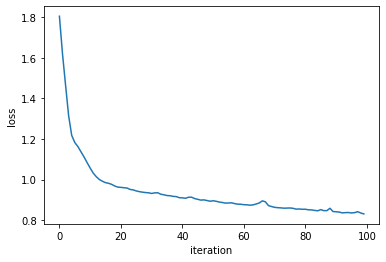

In [34]:
plt.plot(model.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

**GRIDSEARCHCV**

In [35]:
max_iter=[100,200,250,150,300]
solver=['sgd','adam']
activation=['tanh','sigmoid','relu']
alpha=[0.0001,0.10,0.05]

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_iter':max_iter,'solver':solver,'activation':activation,'alpha':alpha}
gridsearch=GridSearchCV(model,param_grid,cv=5)
gridsearch.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(120, 100, 46),
                                     max_iter=100),
             param_grid={'activation': ['tanh', 'sigmoid', 'relu'],
                         'alpha': [0.0001, 0.1, 0.05],
                         'max_iter': [100, 200, 250, 150, 300],
                         'solver': ['sgd', 'adam']})

**BEST PARAMETER AND SCORES**

In [37]:
print("best parameter",gridsearch.best_params_)

best parameter {'activation': 'tanh', 'alpha': 0.05, 'max_iter': 150, 'solver': 'adam'}


In [39]:
print("best score",gridsearch.best_score_)

best score 0.6031950672645741
